# Time Series Analysis
## Holt-Winters model

In [1]:
import pandas as pd
from scipy.optimize import minimize

from models import HoltWinters
from models import calibration

In [2]:
# import data
series = pd.read_csv('data/^GSPC.csv', index_col=['Date'], skiprows=range(1, 1000), usecols=['Date', 'Open'],
                     parse_dates=['Date'])

### Optimize parameters of the model

In [3]:
# Initialize parameters of optimization problem
season = 60  # 60-day seasonality
data = series.Open[:-season]
mean_abs_percentage_error = HoltWinters.mean_absolute_percentage_error
parameters = data, mean_abs_percentage_error, season

constraints = (0, 1), (0, 1), (0, 1)
x = [0, 0, 0]  # Initial guess

# Objective function to be minimized
objective_function = calibration.cross_validation_score

In [4]:
%%time

# Perform cross-validation of Holt-Winters model
# optimization algorithms: TNC, CG
opt = minimize(objective_function, x0=x,
               args=parameters,
               method='CG', bounds=constraints)

# Retrieve optimized parameters
alpha_opt, beta_opt, gamma_opt = opt.x
print('Optimal parameters for Holt-Winters model:'
      '\nalpha = {} \nbeta = {} \ngamma = {}\n'.format(alpha_opt, beta_opt, gamma_opt))

Optimal parameters for Holt-Winters model:
alpha = 1.0146968871929192 
beta = -0.0027016457942909927 
gamma = 0.017811133099220368

CPU times: user 5.83 s, sys: 61.5 ms, total: 5.89 s
Wall time: 6.42 s


### Forecast values with calibrated model

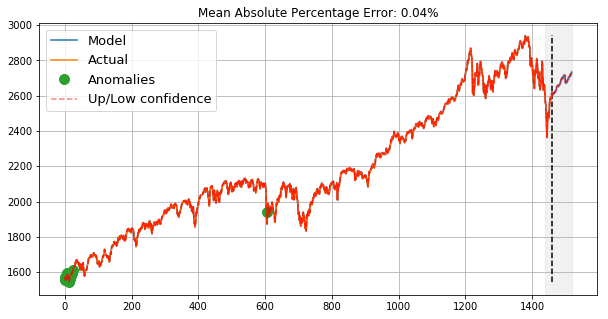

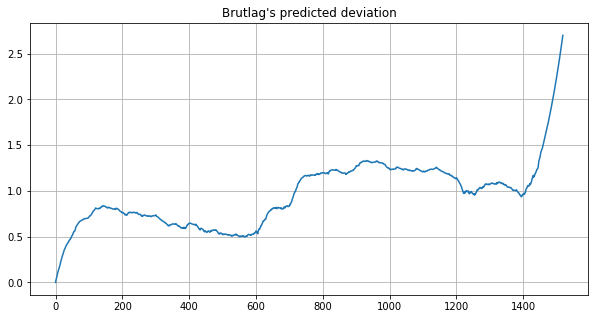

In [5]:
# Initialize optimized model
model = HoltWinters.HoltWinters(data, slen=season,
                                alpha=alpha_opt,
                                beta=beta_opt,
                                gamma=gamma_opt,
                                n_preds=60, scaling_factor=3)

# Run time series approximation
model.triple_exponential_smoothing()

# Plot results of the model against actual values
model.plot(plot_intervals=True, plot_anomalies=True)

# Display deviation of results
model.plotBrutlags()